In [1]:
import networkx as nx

In [2]:
import NEAT 

In [3]:
network = NEAT.network()

In [4]:
network.initalize_network(8, 4)

In [5]:
G = nx.DiGraph()

In [6]:
G.add_nodes_from(network.nodes)

In [7]:
import matplotlib.pyplot as plt

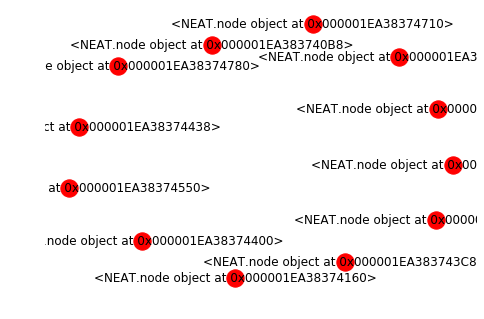

In [8]:
nx.draw(G, with_labels = True)

In [9]:
n = NEAT.network()

In [10]:
n.initalize_network(4, 4, [4,5,3,9])

In [11]:
for i in range(1):
    print(i, ": " )
    n.mutation()


0 : 


In [12]:
 n.generate_graph()
#n.draw_graph()

In [13]:
for node in n.nodes:
    if node.label == "hidden8":
        for node1 in node.connected_to_in:
            print(node1.input_node.label)

In [14]:
n.generate_graph()
#n.draw_graph()

In [15]:
y = [connection for connection in n.weights]

In [16]:
#sorted(y, key = lambda x: x.innovation_number, reverse = True)

In [17]:
#y

In [18]:
#new.draw_graph()

In [19]:
#n.draw_graph()

In [20]:
for i in range (1000):
    if n.mutation():
        n.current_innovation += 1
    n.current_innovation += 1
print("done")

n.generate_graph()

done


In [21]:
import numpy as np
x = [weight.innovation_number for weight in n.weights]
values, counts = np.unique(x, return_counts = True)
counts

array([17,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [22]:
n.convert_to_genes(n.current_innovation)
for gene in n.genes:
    if gene != None:
        gene.print_gene()

1097
hidden8 -> output 4  Inovation_number:  1 

input 3 -> hidden9 DISABLED Inovation_number:  16 

hidden9 -> output 7  Inovation_number:  17 

input 1 -> hidden10 DISABLED Inovation_number:  30 

hidden10 -> output 7 DISABLED Inovation_number:  31 

input 3 -> hidden11 DISABLED Inovation_number:  33 

hidden11 -> output 6 DISABLED Inovation_number:  34 

input 3 -> hidden12 DISABLED Inovation_number:  40 

hidden12 -> hidden8  Inovation_number:  41 

input 3 -> hidden13 DISABLED Inovation_number:  42 

hidden13 -> hidden9 DISABLED Inovation_number:  43 

input 3 -> hidden14 DISABLED Inovation_number:  44 

hidden14 -> hidden13 DISABLED Inovation_number:  45 

hidden13 -> hidden15  Inovation_number:  64 

hidden15 -> hidden9  Inovation_number:  65 

input 2 -> hidden16 DISABLED Inovation_number:  97 

hidden16 -> output 7 DISABLED Inovation_number:  98 

hidden11 -> hidden17 DISABLED Inovation_number:  117 

hidden17 -> output 6 DISABLED Inovation_number:  118 

input 2 -> hidden18  

hidden63 -> hidden100 DISABLED Inovation_number:  1035 

hidden100 -> hidden17  Inovation_number:  1036 

hidden99 -> hidden101  Inovation_number:  1040 

hidden101 -> hidden79  Inovation_number:  1041 

hidden63 -> hidden102  Inovation_number:  1071 

hidden102 -> hidden100  Inovation_number:  1072 

hidden77 -> hidden103  Inovation_number:  1089 

hidden103 -> output 4  Inovation_number:  1090 

input 1 -> hidden104  Inovation_number:  1092 

hidden104 -> hidden67  Inovation_number:  1093 



In [23]:
n1  = NEAT.create_new_network_from_genes(n.genes)
NEAT.are_networks_equal(n, n1)

not iso


False

In [24]:
n.test_network()

(False, 1, 4, []) input 0
(False, 1, 5, []) input 1
(False, 1, 3, []) input 2
(False, 1, 9, []) input 3
(True, 14435.423215724133, 14435.423215724133, [1, -816.7975249479817]) hidden8
(True, 32625.188712907446, 32625.188712907446, [-635.5325955397583, 30914.694573165434]) hidden9
(True, -1.9922130856771054, -1.9922130856771054, [-11.506695079186155]) hidden10
(True, -32.90710431464276, -32.90710431464276, [-5.818218968390566]) hidden11
(True, 1, 1, []) hidden12
(True, 169.8134049797313, 169.8134049797313, [-4.159686624522382, -7.4282488881117885]) hidden13
(True, 1, 1, []) hidden14
(True, -635.5325955397583, -635.5325955397583, [169.8134049797313]) hidden15
(True, -34.994930809114166, -34.994930809114166, [1, 85.28830131188336]) hidden17
(True, -80.07439582580551, -80.07439582580551, [3]) hidden18
(True, -4.159686624522382, -4.159686624522382, [9]) hidden21
(True, -145.47406394059925, -145.47406394059925, [5.7454147407209915]) hidden22
(True, 30914.694573165434, 30914.694573165434, [-6

In [25]:
temp = n.get_node_from_label("hidden37")
print(temp.log)
print(temp.mutation_log)

print(temp.test_value())


RESET: 	 Old Value: 1


(False, 29.75101322894237, 1, [1, 1])


In [26]:
n.evaluate_network()

[25241.990973910917,
 -933.5302105486533,
 -10969.261579621798,
 80246.83606318728]